In [2]:
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import pandas_datareader.data as web
import pandas_datareader.data as web
import pandas as pd
from ta import *
from dateutil import parser
from datetime import datetime

from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
from nltk.tokenize import word_tokenize, RegexpTokenizer

import math
from pprint import pprint
from IPython import display
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords

In [3]:
style.use('ggplot')
start = dt.datetime(2003, 1, 1)
end = dt.datetime.now()

## Stock market data

In [4]:
#df = web.DataReader("AAPL", 'morningstar', start, end)
df = web.get_data_yahoo('AMZN', start=start, end=end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2003-01-02,19.680000,18.549999,19.190001,19.570000,6484000,19.570000
2003-01-03,20.530001,19.410000,19.590000,20.520000,8757000,20.520000
2003-01-06,21.170000,20.299999,20.400000,20.700001,7698100,20.700001
2003-01-07,21.750000,20.600000,20.830000,21.549999,9568200,21.549999
2003-01-08,21.600000,20.820000,21.440001,21.020000,6981500,21.020000


### Stock return

In [5]:
#Stock return
df['returns'] = np.log(df['Adj Close'] / df['Adj Close'].shift(1))     

In [6]:
df['returns_dis'] = df['Adj Close']/df['Adj Close'].shift(1)-1

In [7]:
df['return_dis2'] = df['Adj Close'].pct_change()

In [8]:
df['position'] = np.where(df['returns'] > 0, 1, -1)    

In [9]:
print (df.dtypes)

High           float64
Low            float64
Open           float64
Close          float64
Volume           int64
Adj Close      float64
returns        float64
returns_dis    float64
return_dis2    float64
position         int32
dtype: object


In [377]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close,returns,returns_dis,return_dis2,position
Date,,,,,,,,,,
2019-09-23,1792.699951,1767.319946,1777.000000,1785.300049,2922300,1785.300049,-0.004950,-0.004938,-0.004938,-1
2019-09-24,1795.709961,1735.550049,1790.609985,1741.609985,4616000,1741.609985,-0.024777,-0.024472,-0.024472,-1
2019-09-25,1773.000000,1723.000000,1747.359985,1768.329956,3493200,1768.329956,0.015226,0.015342,0.015342,1
2019-09-26,1763.369995,1731.500000,1762.790039,1739.839966,3536800,1739.839966,-0.016242,-0.016111,-0.016111,-1
2019-09-27,1749.119995,1714.000000,1748.000000,1725.449951,3837619,1725.449951,-0.008305,-0.008271,-0.008271,-1


In [366]:
try_ =df.copy()
try_.head()
try_.reset_index(inplace=True)
try_.index
try_.Date = pd.to_datetime(try_['Date']).dt.strftime('%Y-%m-%d')
#dates.dt.strftime('%Y-%m-%d')
#= pd.to_datetime(df['Date'])
print (try_.dtypes)
try_.set_index('Date', inplace = True)
try_.head() 

Date          object
High         float64
Low          float64
Open         float64
Close        float64
Volume         int64
Adj Close    float64
dtype: object


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2003-01-02,19.680000,18.549999,19.190001,19.570000,6484000,19.570000
2003-01-03,20.530001,19.410000,19.590000,20.520000,8757000,20.520000
2003-01-06,21.170000,20.299999,20.400000,20.700001,7698100,20.700001
2003-01-07,21.750000,20.600000,20.830000,21.549999,9568200,21.549999
2003-01-08,21.600000,20.820000,21.440001,21.020000,6981500,21.020000


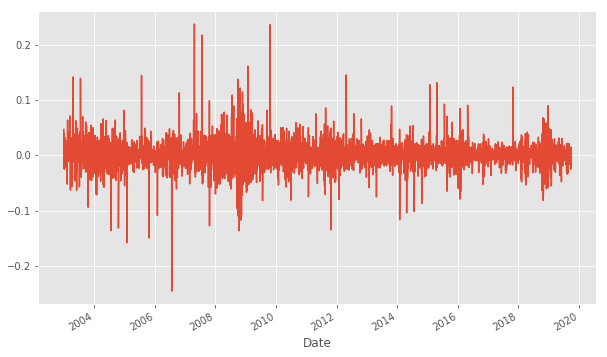

In [10]:
df['returns'].plot(figsize=(10, 6))  

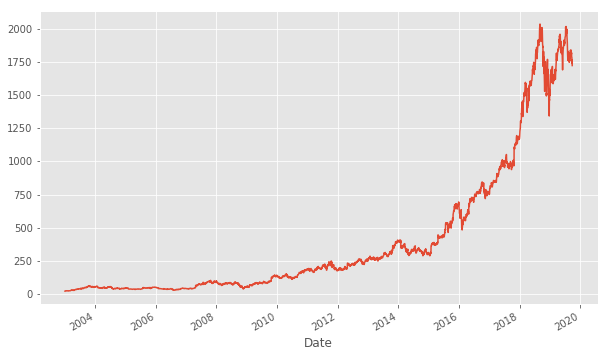

In [11]:
df['Adj Close'].plot(figsize=(10, 6))  

In [12]:
#cumulated sum
#df['returns'].cumsum().apply(np.exp).plot(figsize=(10, 6))  

## Load news headlines

In [13]:
Stock_df = pd.read_csv('../Project Data/AMZN_data.csv', encoding='utf-8-sig')
print (Stock_df.dtypes)
Stock_df.head()

FileNotFoundError: File b'../Project Data/AMZN_data.csv' does not exist

In [3]:
# convert the 'date' column of each dataframe to format: Y-M-D
Stock_df['Date'] = Stock_df.apply(lambda x:( parser.parse(x['timestamp_utc']).strftime('%Y-%m-%d')),axis=1)
#print (Stock_df.dtypes)
#Stock_df.set_index('Date', inplace = True)

In [16]:
#print (Stock_df.dtypes)
Stock_df.tail()

,Unnamed: 0,country_code,entity_name,entity_type,event_sentiment_score,group,headline,relevance,rp_entity_id,rp_story_id,timestamp_utc,topic,Date
729454,3139,US,Amazon.com Inc.,COMP,0.38,labor-issues,Amazon's 'career day' expected to draw thousan...,99,0157B1,C450C9AB2CFB3BB077855189A1092DF0,2019-09-15 20:25:40.410,business,2019-09-15
729455,3140,US,Amazon.com Inc.,COMP,0.26,corporate-responsibility,Amazon's 'career day' expected to draw thousan...,99,0157B1,C450C9AB2CFB3BB077855189A1092DF0,2019-09-15 20:25:40.410,society,2019-09-15
729456,3141,US,Amazon.com Inc.,COMP,NaN,NaN,Amazon and Roku Are Battling for Supremacy in ...,99,0157B1,682AF86A14FD664D32EB966FFEC9B02D,2019-09-15 20:15:41.300,NaN,2019-09-15
729457,3142,US,Amazon.com Inc.,COMP,NaN,NaN,Marin campaign to curtail Amazon packaging gai...,99,0157B1,DDDAF7A0EBFFE25010B8CDFFB37E03FF,2019-09-15 19:34:32.068,NaN,2019-09-15
729458,3143,US,Amazon.com Inc.,COMP,NaN,NaN,Marin campaign to curtail Amazon packaging gai...,99,0157B1,907734C5ED73933BD1FC183C27C0E753,2019-09-15 19:30:24.725,NaN,2019-09-15


### Distribution of News Articles for Amazon

In [ ]:
# plt.figure(figsize=(12,6))
# Stock_df['Date'].hist(bins=30)
# plt.ylabel('Number of News Articles')
# plt.xlabel('Date')
# plt.title('Volume of Stock News Articles')

E:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  after removing the cwd from sys.path.


Text(0.5, 1.0, 'Volume of Stock News Articles')

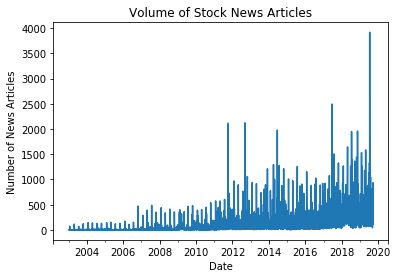

In [18]:
Stock_df['Date'].value_counts()

Stock_df['Date'] = pd.to_datetime(Stock_df['Date'], errors="coerce")
pd.Series(1,Stock_df['Date']).resample("D", how="sum").plot()
plt.ylabel('Number of News Articles')
plt.xlabel('Date')
plt.title('Volume of Stock News Articles')

## Sentiment score from SIA

In [269]:

sia = SIA()
results = []

for line in Stock_df["headline"]:
    pol_score = sia.polarity_scores(line)
    pol_score['headline'] = line
    results.append(pol_score)

In [270]:
print(results[:3])

[{'neg': 0.31, 'neu': 0.529, 'pos': 0.161, 'compound': -0.7351, 'headline': 'Year-End Review of Money & Investing 2002  ---  Scandals and Poor Profits Hurt Markets  ---  Major Investment Styles,  Sectors Suffered in 2002;  One Winner: Amazon.com  ----  By Ken Brown'}, {'neg': 0.377, 'neu': 0.623, 'pos': 0.0, 'compound': -0.7034, 'headline': 'Amazon.com-AMZN should meet & potentially beat 4Q expectations says FBCO'}, {'neg': 0.291, 'neu': 0.709, 'pos': 0.0, 'compound': -0.5719, 'headline': "Amazon's Delivery Delays Anger Some Buyers  ----  By Nick Wingfield"}]


In [271]:
df_sentiment = pd.DataFrame.from_records(results)
df_sentiment.head()

,compound,headline,neg,neu,pos
0,-0.7351,Year-End Review of Money & Investing 2002 ---...,0.310,0.529,0.161
1,-0.7034,Amazon.com-AMZN should meet & potentially beat...,0.377,0.623,0.000
2,-0.5719,Amazon's Delivery Delays Anger Some Buyers --...,0.291,0.709,0.000
3,-0.2023,Amazon Delivery Woes Rile Buyers --- Some Co...,0.208,0.615,0.177
4,0.1779,Amazon Delivery Delays Rile Some Buyers ---- ...,0.000,0.841,0.159


In [272]:
df_sentiment['label'] = 0
df_sentiment.loc[df_sentiment['compound'] > 0.2, 'label'] = 1
df_sentiment.loc[df_sentiment['compound'] < -0.2, 'label'] = -1
df_sentiment.head()

,compound,headline,neg,neu,pos,label
0,-0.7351,Year-End Review of Money & Investing 2002 ---...,0.310,0.529,0.161,-1
1,-0.7034,Amazon.com-AMZN should meet & potentially beat...,0.377,0.623,0.000,-1
2,-0.5719,Amazon's Delivery Delays Anger Some Buyers --...,0.291,0.709,0.000,-1
3,-0.2023,Amazon Delivery Woes Rile Buyers --- Some Co...,0.208,0.615,0.177,-1
4,0.1779,Amazon Delivery Delays Rile Some Buyers ---- ...,0.000,0.841,0.159,0


### Combine dfs of compound and event_sentiment_score

In [282]:
Combined_df=df_sentiment.merge(Stock_df,left_on=['headline'], right_on=['headline'])

In [283]:
Combined_df.head()

,compound,headline,neg,neu,pos,label,Unnamed: 0,country_code,entity_name,entity_type,event_sentiment_score,group,relevance,rp_entity_id,rp_story_id,timestamp_utc,topic,Date
0,-0.7351,Year-End Review of Money & Investing 2002 ---...,0.310,0.529,0.161,-1,0,US,Amazon.com Inc.,COMP,NaN,NaN,96,0157B1,28180A6B8151B8C84849726866BDE3FF,2003-01-02 05:00:00.000,NaN,2003-01-02
1,-0.7034,Amazon.com-AMZN should meet & potentially beat...,0.377,0.623,0.000,-1,0,US,Amazon.com Inc.,COMP,NaN,NaN,91,0157B1,293992C4FE9ED4BA39C3168422EEA8DC,2003-01-03 13:13:34.000,NaN,2003-01-03
2,-0.5719,Amazon's Delivery Delays Anger Some Buyers --...,0.291,0.709,0.000,-1,0,US,Amazon.com Inc.,COMP,NaN,NaN,99,0157B1,9C7FBE6A60FBAD214D0D6C89E5FF048D,2003-01-10 23:30:00.000,NaN,2003-01-10
3,-0.2023,Amazon Delivery Woes Rile Buyers --- Some Co...,0.208,0.615,0.177,-1,1,US,Amazon.com Inc.,COMP,NaN,NaN,99,0157B1,9786C97B58EAC6A9A7D5F815B579C7A1,2003-01-10 05:00:00.000,NaN,2003-01-10
4,0.1779,Amazon Delivery Delays Rile Some Buyers ---- ...,0.000,0.841,0.159,0,2,US,Amazon.com Inc.,COMP,NaN,NaN,99,0157B1,2963E0FBD653E8ABB073ECC01491E350,2003-01-09 07:00:00.000,NaN,2003-01-09


In [286]:
temp_df=Combined_df.copy()
temp_df=temp_df.dropna()

In [288]:
temp_df.reset_index(drop=True,inplace=True)
temp_df.head()

,compound,headline,neg,neu,pos,label,Unnamed: 0,country_code,entity_name,entity_type,event_sentiment_score,group,relevance,rp_entity_id,rp_story_id,timestamp_utc,topic,Date
0,0.0000,Amazon.com Inc. FY2002 Sales USD 3.93B Vs USD ...,0.0,1.000,0.000,0,0,US,Amazon.com Inc.,COMP,0.44,revenues,100,0157B1,EF19531D5F1AC229A287CFB9806E2A9C,2003-01-25 00:00:00.000,business,2003-01-25
1,0.0000,Amazon.com Inc. FY2002 Diluted Reported EPS US...,0.0,1.000,0.000,0,1,US,Amazon.com Inc.,COMP,0.72,earnings,100,0157B1,F851FE2EC7CDA12F89F4CA0DD92485B3,2003-01-25 00:00:00.000,business,2003-01-25
2,0.4404,Amazon.com Inc. Reports FY2002 Pre-Tax Profit ...,0.0,0.791,0.209,1,2,US,Amazon.com Inc.,COMP,0.44,earnings,100,0157B1,2B23D2FD11ABFC491765AC8C12EB79EF,2003-01-25 00:00:00.000,business,2003-01-25
3,0.4404,Amazon.com Inc. FY2002 Net Profit USD -149.13M...,0.0,0.756,0.244,1,3,US,Amazon.com Inc.,COMP,0.72,earnings,100,0157B1,90C0B33E9FF223B0A9A7E607F1DA2785,2003-01-25 00:00:00.000,business,2003-01-25
4,0.0000,Amazon.com Inc. Q4 Diluted Reported EPS USD 0....,0.0,1.000,0.000,0,4,US,Amazon.com Inc.,COMP,0.00,earnings,100,0157B1,C41DB5B9A8941D629BD880A669F71515,2003-01-25 00:00:00.000,business,2003-01-25


### Correlation between compound and event_sentiment_score}

In [291]:
data = temp_df[['compound','event_sentiment_score']]
correlation = data.corr(method='pearson')
correlation

,compound,event_sentiment_score
compound,1.000000,0.134658
event_sentiment_score,0.134658,1.000000


In [293]:
temp_stock_df=temp_df [["Date","compound","event_sentiment_score"]].copy()
#new = old[['A', 'C', 'D']].copy()

In [294]:
temp_stock_df.head()

,Date,compound,event_sentiment_score
0,2003-01-25,0.0000,0.44
1,2003-01-25,0.0000,0.72
2,2003-01-25,0.4404,0.44
3,2003-01-25,0.4404,0.72
4,2003-01-25,0.0000,0.00


In [295]:
date_unique_df = temp_stock_df.groupby([temp_stock_df['Date']]).mean()

In [296]:
date_unique_df.head()

,compound,event_sentiment_score
Date,,
2003-01-23,-0.511478,0.044695
2003-01-24,0.283771,0.491316
2003-01-25,0.137625,0.429375
2003-01-27,0.177900,0.576667
2003-02-05,0.074000,-0.490000


### Combine stock price & compound & event_sentiment_score to 1 df and cal correlation between return and score

In [359]:
Combined_df_2=pd.merge(try_, date_unique_df,left_index=True, right_index=True)
#pd.merge(df1, df2, left_index=True, right_index=True)

In [360]:
Combined_df_2.head()

,High,Low,Open,Close,Volume,Adj Close,returns,returns_dis,return_dis2,position,compound,event_sentiment_score
Date,,,,,,,,,,,,
2003-01-23,22.040001,21.150000,21.540001,21.790001,10998000,21.790001,0.028866,0.029287,0.029287,1,-0.511478,0.044695
2003-01-24,23.280001,21.900000,22.590000,22.110001,21681800,22.110001,0.014579,0.014686,0.014686,1,0.283771,0.491316
2003-01-27,22.370001,21.639999,21.680000,21.780001,8207000,21.780001,-0.015038,-0.014925,-0.014925,-1,0.177900,0.576667
2003-02-05,22.500000,22.030001,22.180000,22.170000,5343100,22.170000,0.005427,0.005442,0.005442,1,0.074000,-0.490000
2003-02-06,22.480000,21.930000,22.160000,22.090000,4037700,22.090000,-0.003615,-0.003608,-0.003608,-1,-0.273200,-0.490000


In [325]:
Combined_df_2.shape

(3612, 12)

In [321]:
re_score= Combined_df_2[['returns','event_sentiment_score']]
re_score_correlation = re_score.corr(method='pearson')
re_score_correlation

,returns,event_sentiment_score
returns,1.000000,0.091688
event_sentiment_score,0.091688,1.000000


In [336]:
Combined_df_2["returns"].corr(Combined_df_2["event_sentiment_score"].shift(-1), method = 'pearson', min_periods = 1)

0.041247396933928905

In [322]:
re_score= Combined_df_2[['returns','compound']]
re_score_correlation = re_score.corr(method='pearson')
re_score_correlation

,returns,compound
returns,1.000000,0.054819
compound,0.054819,1.000000


In [339]:
Combined_df_2["returns"].corr(Combined_df_2["compound"].shift(-1), method = 'pearson', min_periods = 1)

0.03148115034591009

## Score Distribution

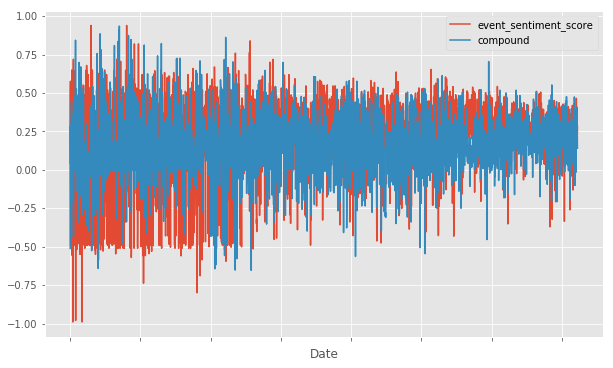

In [353]:
Combined_df_2['event_sentiment_score'].plot(figsize=(10, 6))  
Combined_df_2['compound'].plot(figsize=(10, 6))  
plt.legend()

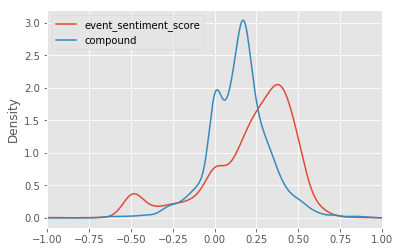

In [350]:
Combined_df_2['event_sentiment_score'].plot.kde(label='event_sentiment_score')
Combined_df_2['compound'].plot.kde()
#plt.title('event_sentiment_score distribution')
plt.xlim(-1,1)
plt.legend()

In [362]:
Combined_df_2['Quantile_rank_event']=pd.qcut(Combined_df_2['event_sentiment_score'],5,labels=False)+1
Combined_df_2['Quantile_rank_compound']=pd.qcut(Combined_df_2['compound'],5,labels=False)+1
Combined_df_2.head()

,High,Low,Open,Close,Volume,Adj Close,returns,returns_dis,return_dis2,position,compound,event_sentiment_score,Quantile_rank_event,Quantile_rank_compound
Date,,,,,,,,,,,,,,
2003-01-23,22.040001,21.150000,21.540001,21.790001,10998000,21.790001,0.028866,0.029287,0.029287,1,-0.511478,0.044695,2,1
2003-01-24,23.280001,21.900000,22.590000,22.110001,21681800,22.110001,0.014579,0.014686,0.014686,1,0.283771,0.491316,5,5
2003-01-27,22.370001,21.639999,21.680000,21.780001,8207000,21.780001,-0.015038,-0.014925,-0.014925,-1,0.177900,0.576667,5,3
2003-02-05,22.500000,22.030001,22.180000,22.170000,5343100,22.170000,0.005427,0.005442,0.005442,1,0.074000,-0.490000,1,2
2003-02-06,22.480000,21.930000,22.160000,22.090000,4037700,22.090000,-0.003615,-0.003608,-0.003608,-1,-0.273200,-0.490000,1,1


## Dataset Info and Statistics

In [ ]:
#Tokenizers and Stopwords
stop_words = stopwords.words('english')
print(stop_words[:20])

In [ ]:
example = "This is an example sentence! However, it isn't a very informative one"

print(word_tokenize(example, language='english'))
tokenizer = RegexpTokenizer(r'\w+')
tokenizer.tokenize(example)

In [ ]:
#Word Distributions
def process_text(headlines):
    tokens = []
    for line in headlines:
        toks = tokenizer.tokenize(line)
        toks = [t.lower() for t in toks if t.lower() not in stop_words]
        tokens.extend(toks)
    
    return tokens
tokens=process_text(Stock_df["headline"])

## Positive & negative headlines

In [ ]:
print("Positive headlines:\n")
pprint(list(df_sentiment[df_sentiment['label'] == 1].headline)[:5], width=200)

print("\nNegative headlines:\n")
pprint(list(df_sentiment[df_sentiment['label'] == -1].headline)[:5], width=200)

In [ ]:
print(df_sentiment.label.value_counts())

print(df_sentiment.label.value_counts(normalize=True) * 100)

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))

counts = df_sentiment.label.value_counts(normalize=True) * 100

sns.barplot(x=counts.index, y=counts, ax=ax)

ax.set_xticklabels(['Negative', 'Neutral', 'Positive'])
ax.set_ylabel("Percentage")

plt.show()

In [ ]:
#postive words
pos_lines = list(df_sentiment[df_sentiment.label == 1].headline)

pos_tokens = process_text(pos_lines)
pos_freq = nltk.FreqDist(pos_tokens)

pos_freq.most_common(20)

In [ ]:
y_val = [x[1] for x in pos_freq.most_common()]

fig = plt.figure(figsize=(10,5))
plt.plot(y_val)

plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Word Frequency Distribution (Positive)")
plt.show()

In [ ]:
#Negative Words
neg_lines = list(df_sentiment[df_sentiment.label == -1].headline)

neg_tokens = process_text(neg_lines)
neg_freq = nltk.FreqDist(neg_tokens)

neg_freq.most_common(20)

In [ ]:
y_val = [x[1] for x in neg_freq.most_common()]

fig = plt.figure(figsize=(10,5))
plt.plot(y_val)

plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Word Frequency Distribution (Negative)")
plt.show()

## Financial Indicator

In [ ]:
#https://pythonforfinance.net/2017/07/31/bollinger-band-trading-strategy-backtest-in-python/

#Set number of days and standard deviations to use for rolling lookback period for Bollinger band calculation
window = 21
no_of_std = 2
#Calculate rolling mean and standard deviation using number of days set above
rolling_mean = df['Close'].rolling(window).mean()
rolling_std = df['Close'].rolling(window).std()
#create two new DataFrame columns to hold values of upper and lower Bollinger bands
df['Rolling Mean'] = rolling_mean
df['Bollinger High'] = rolling_mean + (rolling_std * no_of_std)
df['Bollinger Low'] = rolling_mean - (rolling_std * no_of_std)
df.head()

In [ ]:
df[['Close','Bollinger High','Bollinger Low']].plot()

In [380]:
#https://www.quantopian.com/posts/technical-analysis-indicators-without-talib-code
#Moving Average  
def MA(df, n):  
    MA = pd.Series(pd.rolling_mean(df['Close'], n), name = 'MA_' + str(n))  
    df = df.join(MA)  
    return df

#Exponential Moving Average  
def EMA(df, n):  
    EMA = pd.Series(pd.ewma(df['Close'], span = n, min_periods = n - 1), name = 'EMA_' + str(n))  
    df = df.join(EMA)  
    return df

#Momentum  
def MOM(df, n):  
    M = pd.Series(df['Close'].diff(n), name = 'Momentum_' + str(n))  
    df = df.join(M)  
    return df

#Rate of Change  
def ROC(df, n):  
    M = df['Close'].diff(n - 1)  
    N = df['Close'].shift(n - 1)  
    ROC = pd.Series(M / N, name = 'ROC_' + str(n))  
    df = df.join(ROC)  
    return df

#Average True Range  
def ATR(df, n):  
    i = 0  
    TR_l = [0]  
    while i < df.index[-1]:  
        TR = max(df.get_value(i + 1, 'High'), df.get_value(i, 'Close')) - min(df.get_value(i + 1, 'Low'), df.get_value(i, 'Close'))  
        TR_l.append(TR)  
        i = i + 1  
    TR_s = pd.Series(TR_l)  
    ATR = pd.Series(pd.ewma(TR_s, span = n, min_periods = n), name = 'ATR_' + str(n))  
    df = df.join(ATR)  
    return df

#Bollinger Bands  
def BBANDS(df, n):  
    MA = pd.Series(pd.rolling_mean(df['Close'], n))  
    MSD = pd.Series(pd.rolling_std(df['Close'], n))  
    b1 = 4 * MSD / MA  
    B1 = pd.Series(b1, name = 'BollingerB_' + str(n))  
    df = df.join(B1)  
    b2 = (df['Close'] - MA + 2 * MSD) / (4 * MSD)  
    B2 = pd.Series(b2, name = 'Bollinger%b_' + str(n))  
    df = df.join(B2)  
    return df

#Pivot Points, Supports and Resistances  
def PPSR(df):  
    PP = pd.Series((df['High'] + df['Low'] + df['Close']) / 3)  
    R1 = pd.Series(2 * PP - df['Low'])  
    S1 = pd.Series(2 * PP - df['High'])  
    R2 = pd.Series(PP + df['High'] - df['Low'])  
    S2 = pd.Series(PP - df['High'] + df['Low'])  
    R3 = pd.Series(df['High'] + 2 * (PP - df['Low']))  
    S3 = pd.Series(df['Low'] - 2 * (df['High'] - PP))  
    psr = {'PP':PP, 'R1':R1, 'S1':S1, 'R2':R2, 'S2':S2, 'R3':R3, 'S3':S3}  
    PSR = pd.DataFrame(psr)  
    df = df.join(PSR)  
    return df

#Stochastic oscillator %K  
def STOK(df):  
    SOk = pd.Series((df['Close'] - df['Low']) / (df['High'] - df['Low']), name = 'SO%k')  
    df = df.join(SOk)  
    return df

# Stochastic Oscillator, EMA smoothing, nS = slowing (1 if no slowing)  
def STO(df,  nK, nD, nS=1):  
    SOk = pd.Series((df['Close'] - df['Low'].rolling(nK).min()) / (df['High'].rolling(nK).max() - df['Low'].rolling(nK).min()), name = 'SO%k'+str(nK))  
    SOd = pd.Series(SOk.ewm(ignore_na=False, span=nD, min_periods=nD-1, adjust=True).mean(), name = 'SO%d'+str(nD))  
    SOk = SOk.ewm(ignore_na=False, span=nS, min_periods=nS-1, adjust=True).mean()  
    SOd = SOd.ewm(ignore_na=False, span=nS, min_periods=nS-1, adjust=True).mean()  
    df = df.join(SOk)  
    df = df.join(SOd)  
    return df  
# Stochastic Oscillator, SMA smoothing, nS = slowing (1 if no slowing)  
def STO(df, nK, nD,  nS=1):  
    SOk = pd.Series((df['Close'] - df['Low'].rolling(nK).min()) / (df['High'].rolling(nK).max() - df['Low'].rolling(nK).min()), name = 'SO%k'+str(nK))  
    SOd = pd.Series(SOk.rolling(window=nD, center=False).mean(), name = 'SO%d'+str(nD))  
    SOk = SOk.rolling(window=nS, center=False).mean()  
    SOd = SOd.rolling(window=nS, center=False).mean()  
    df = df.join(SOk)  
    df = df.join(SOd)  
    return df  
#Trix  
def TRIX(df, n):  
    EX1 = pd.ewma(df['Close'], span = n, min_periods = n - 1)  
    EX2 = pd.ewma(EX1, span = n, min_periods = n - 1)  
    EX3 = pd.ewma(EX2, span = n, min_periods = n - 1)  
    i = 0  
    ROC_l = [0]  
    while i + 1 <= df.index[-1]:  
        ROC = (EX3[i + 1] - EX3[i]) / EX3[i]  
        ROC_l.append(ROC)  
        i = i + 1  
    Trix = pd.Series(ROC_l, name = 'Trix_' + str(n))  
    df = df.join(Trix)  
    return df

#Average Directional Movement Index  
def ADX(df, n, n_ADX):  
    i = 0  
    UpI = []  
    DoI = []  
    while i + 1 <= df.index[-1]:  
        UpMove = df.get_value(i + 1, 'High') - df.get_value(i, 'High')  
        DoMove = df.get_value(i, 'Low') - df.get_value(i + 1, 'Low')  
        if UpMove > DoMove and UpMove > 0:  
            UpD = UpMove  
        else: UpD = 0  
        UpI.append(UpD)  
        if DoMove > UpMove and DoMove > 0:  
            DoD = DoMove  
        else: DoD = 0  
        DoI.append(DoD)  
        i = i + 1  
    i = 0  
    TR_l = [0]  
    while i < df.index[-1]:  
        TR = max(df.get_value(i + 1, 'High'), df.get_value(i, 'Close')) - min(df.get_value(i + 1, 'Low'), df.get_value(i, 'Close'))  
        TR_l.append(TR)  
        i = i + 1  
    TR_s = pd.Series(TR_l)  
    ATR = pd.Series(pd.ewma(TR_s, span = n, min_periods = n))  
    UpI = pd.Series(UpI)  
    DoI = pd.Series(DoI)  
    PosDI = pd.Series(pd.ewma(UpI, span = n, min_periods = n - 1) / ATR)  
    NegDI = pd.Series(pd.ewma(DoI, span = n, min_periods = n - 1) / ATR)  
    ADX = pd.Series(pd.ewma(abs(PosDI - NegDI) / (PosDI + NegDI), span = n_ADX, min_periods = n_ADX - 1), name = 'ADX_' + str(n) + '_' + str(n_ADX))  
    df = df.join(ADX)  
    return df

#MACD, MACD Signal and MACD difference  
def MACD(df, n_fast, n_slow):  
    EMAfast = pd.Series(pd.ewma(df['Close'], span = n_fast, min_periods = n_slow - 1))  
    EMAslow = pd.Series(pd.ewma(df['Close'], span = n_slow, min_periods = n_slow - 1))  
    MACD = pd.Series(EMAfast - EMAslow, name = 'MACD_' + str(n_fast) + '_' + str(n_slow))  
    MACDsign = pd.Series(pd.ewma(MACD, span = 9, min_periods = 8), name = 'MACDsign_' + str(n_fast) + '_' + str(n_slow))  
    MACDdiff = pd.Series(MACD - MACDsign, name = 'MACDdiff_' + str(n_fast) + '_' + str(n_slow))  
    df = df.join(MACD)  
    df = df.join(MACDsign)  
    df = df.join(MACDdiff)  
    return df

#Mass Index  
def MassI(df):  
    Range = df['High'] - df['Low']  
    EX1 = pd.ewma(Range, span = 9, min_periods = 8)  
    EX2 = pd.ewma(EX1, span = 9, min_periods = 8)  
    Mass = EX1 / EX2  
    MassI = pd.Series(pd.rolling_sum(Mass, 25), name = 'Mass Index')  
    df = df.join(MassI)  
    return df

#Vortex Indicator: http://www.vortexindicator.com/VFX_VORTEX.PDF  
def Vortex(df, n):  
    i = 0  
    TR = [0]  
    while i < df.index[-1]:  
        Range = max(df.get_value(i + 1, 'High'), df.get_value(i, 'Close')) - min(df.get_value(i + 1, 'Low'), df.get_value(i, 'Close'))  
        TR.append(Range)  
        i = i + 1  
    i = 0  
    VM = [0]  
    while i < df.index[-1]:  
        Range = abs(df.get_value(i + 1, 'High') - df.get_value(i, 'Low')) - abs(df.get_value(i + 1, 'Low') - df.get_value(i, 'High'))  
        VM.append(Range)  
        i = i + 1  
    VI = pd.Series(pd.rolling_sum(pd.Series(VM), n) / pd.rolling_sum(pd.Series(TR), n), name = 'Vortex_' + str(n))  
    df = df.join(VI)  
    return df





#KST Oscillator  
def KST(df, r1, r2, r3, r4, n1, n2, n3, n4):  
    M = df['Close'].diff(r1 - 1)  
    N = df['Close'].shift(r1 - 1)  
    ROC1 = M / N  
    M = df['Close'].diff(r2 - 1)  
    N = df['Close'].shift(r2 - 1)  
    ROC2 = M / N  
    M = df['Close'].diff(r3 - 1)  
    N = df['Close'].shift(r3 - 1)  
    ROC3 = M / N  
    M = df['Close'].diff(r4 - 1)  
    N = df['Close'].shift(r4 - 1)  
    ROC4 = M / N  
    KST = pd.Series(pd.rolling_sum(ROC1, n1) + pd.rolling_sum(ROC2, n2) * 2 + pd.rolling_sum(ROC3, n3) * 3 + pd.rolling_sum(ROC4, n4) * 4, name = 'KST_' + str(r1) + '_' + str(r2) + '_' + str(r3) + '_' + str(r4) + '_' + str(n1) + '_' + str(n2) + '_' + str(n3) + '_' + str(n4))  
    df = df.join(KST)  
    return df

#Relative Strength Index  
def RSI(df, n):  
    i = 0  
    UpI = [0]  
    DoI = [0]  
    while i + 1 <= df.index[-1]:  
        UpMove = df.get_value(i + 1, 'High') - df.get_value(i, 'High')  
        DoMove = df.get_value(i, 'Low') - df.get_value(i + 1, 'Low')  
        if UpMove > DoMove and UpMove > 0:  
            UpD = UpMove  
        else: UpD = 0  
        UpI.append(UpD)  
        if DoMove > UpMove and DoMove > 0:  
            DoD = DoMove  
        else: DoD = 0  
        DoI.append(DoD)  
        i = i + 1  
    UpI = pd.Series(UpI)  
    DoI = pd.Series(DoI)  
    PosDI = pd.Series(pd.ewma(UpI, span = n, min_periods = n - 1))  
    NegDI = pd.Series(pd.ewma(DoI, span = n, min_periods = n - 1))  
    RSI = pd.Series(PosDI / (PosDI + NegDI), name = 'RSI_' + str(n))  
    df = df.join(RSI)  
    return df

#True Strength Index  
def TSI(df, r, s):  
    M = pd.Series(df['Close'].diff(1))  
    aM = abs(M)  
    EMA1 = pd.Series(pd.ewma(M, span = r, min_periods = r - 1))  
    aEMA1 = pd.Series(pd.ewma(aM, span = r, min_periods = r - 1))  
    EMA2 = pd.Series(pd.ewma(EMA1, span = s, min_periods = s - 1))  
    aEMA2 = pd.Series(pd.ewma(aEMA1, span = s, min_periods = s - 1))  
    TSI = pd.Series(EMA2 / aEMA2, name = 'TSI_' + str(r) + '_' + str(s))  
    df = df.join(TSI)  
    return df

#Accumulation/Distribution  
def ACCDIST(df, n):  
    ad = (2 * df['Close'] - df['High'] - df['Low']) / (df['High'] - df['Low']) * df['Volume']  
    M = ad.diff(n - 1)  
    N = ad.shift(n - 1)  
    ROC = M / N  
    AD = pd.Series(ROC, name = 'Acc/Dist_ROC_' + str(n))  
    df = df.join(AD)  
    return df

#Chaikin Oscillator  
def Chaikin(df):  
    ad = (2 * df['Close'] - df['High'] - df['Low']) / (df['High'] - df['Low']) * df['Volume']  
    Chaikin = pd.Series(pd.ewma(ad, span = 3, min_periods = 2) - pd.ewma(ad, span = 10, min_periods = 9), name = 'Chaikin')  
    df = df.join(Chaikin)  
    return df

#Money Flow Index and Ratio  
def MFI(df, n):  
    PP = (df['High'] + df['Low'] + df['Close']) / 3  
    i = 0  
    PosMF = [0]  
    while i < df.index[-1]:  
        if PP[i + 1] > PP[i]:  
            PosMF.append(PP[i + 1] * df.get_value(i + 1, 'Volume'))  
        else:  
            PosMF.append(0)  
        i = i + 1  
    PosMF = pd.Series(PosMF)  
    TotMF = PP * df['Volume']  
    MFR = pd.Series(PosMF / TotMF)  
    MFI = pd.Series(pd.rolling_mean(MFR, n), name = 'MFI_' + str(n))  
    df = df.join(MFI)  
    return df

#On-balance Volume  
def OBV(df, n):  
    i = 0  
    OBV = [0]  
    while i < df.index[-1]:  
        if df.get_value(i + 1, 'Close') - df.get_value(i, 'Close') > 0:  
            OBV.append(df.get_value(i + 1, 'Volume'))  
        if df.get_value(i + 1, 'Close') - df.get_value(i, 'Close') == 0:  
            OBV.append(0)  
        if df.get_value(i + 1, 'Close') - df.get_value(i, 'Close') < 0:  
            OBV.append(-df.get_value(i + 1, 'Volume'))  
        i = i + 1  
    OBV = pd.Series(OBV)  
    OBV_ma = pd.Series(pd.rolling_mean(OBV, n), name = 'OBV_' + str(n))  
    df = df.join(OBV_ma)  
    return df

#Force Index  
def FORCE(df, n):  
    F = pd.Series(df['Close'].diff(n) * df['Volume'].diff(n), name = 'Force_' + str(n))  
    df = df.join(F)  
    return df

#Ease of Movement  
def EOM(df, n):  
    EoM = (df['High'].diff(1) + df['Low'].diff(1)) * (df['High'] - df['Low']) / (2 * df['Volume'])  
    Eom_ma = pd.Series(pd.rolling_mean(EoM, n), name = 'EoM_' + str(n))  
    df = df.join(Eom_ma)  
    return df

#Commodity Channel Index  
def CCI(df, n):  
    PP = (df['High'] + df['Low'] + df['Close']) / 3  
    CCI = pd.Series((PP - pd.rolling_mean(PP, n)) / pd.rolling_std(PP, n), name = 'CCI_' + str(n))  
    df = df.join(CCI)  
    return df

#Coppock Curve  
def COPP(df, n):  
    M = df['Close'].diff(int(n * 11 / 10) - 1)  
    N = df['Close'].shift(int(n * 11 / 10) - 1)  
    ROC1 = M / N  
    M = df['Close'].diff(int(n * 14 / 10) - 1)  
    N = df['Close'].shift(int(n * 14 / 10) - 1)  
    ROC2 = M / N  
    Copp = pd.Series(pd.ewma(ROC1 + ROC2, span = n, min_periods = n), name = 'Copp_' + str(n))  
    df = df.join(Copp)  
    return df

#Keltner Channel  
def KELCH(df, n):  
    KelChM = pd.Series(pd.rolling_mean((df['High'] + df['Low'] + df['Close']) / 3, n), name = 'KelChM_' + str(n))  
    KelChU = pd.Series(pd.rolling_mean((4 * df['High'] - 2 * df['Low'] + df['Close']) / 3, n), name = 'KelChU_' + str(n))  
    KelChD = pd.Series(pd.rolling_mean((-2 * df['High'] + 4 * df['Low'] + df['Close']) / 3, n), name = 'KelChD_' + str(n))  
    df = df.join(KelChM)  
    df = df.join(KelChU)  
    df = df.join(KelChD)  
    return df

#Ultimate Oscillator  
def ULTOSC(df):  
    i = 0  
    TR_l = [0]  
    BP_l = [0]  
    while i < df.index[-1]:  
        TR = max(df.get_value(i + 1, 'High'), df.get_value(i, 'Close')) - min(df.get_value(i + 1, 'Low'), df.get_value(i, 'Close'))  
        TR_l.append(TR)  
        BP = df.get_value(i + 1, 'Close') - min(df.get_value(i + 1, 'Low'), df.get_value(i, 'Close'))  
        BP_l.append(BP)  
        i = i + 1  
    UltO = pd.Series((4 * pd.rolling_sum(pd.Series(BP_l), 7) / pd.rolling_sum(pd.Series(TR_l), 7)) + (2 * pd.rolling_sum(pd.Series(BP_l), 14) / pd.rolling_sum(pd.Series(TR_l), 14)) + (pd.rolling_sum(pd.Series(BP_l), 28) / pd.rolling_sum(pd.Series(TR_l), 28)), name = 'Ultimate_Osc')  
    df = df.join(UltO)  
    return df

#Donchian Channel  
def DONCH(df, n):  
    i = 0  
    DC_l = []  
    while i < n - 1:  
        DC_l.append(0)  
        i = i + 1  
    i = 0  
    while i + n - 1 < df.index[-1]:  
        DC = max(df['High'].ix[i:i + n - 1]) - min(df['Low'].ix[i:i + n - 1])  
        DC_l.append(DC)  
        i = i + 1  
    DonCh = pd.Series(DC_l, name = 'Donchian_' + str(n))  
    DonCh = DonCh.shift(n - 1)  
    df = df.join(DonCh)  
    return df

#Standard Deviation  
def STDDEV(df, n):  
    df = df.join(pd.Series(pd.rolling_std(df['Close'], n), name = 'STD_' + str(n)))  
    return df

In [ ]:
#https://mrjbq7.github.io/ta-lib/
#https://stackoverflow.com/questions/35986436/how-to-use-technical-indicators-of-ta-lib-with-pandas-in-python
#https://www.learndatasci.com/tutorials/sentiment-analysis-reddit-headlines-pythons-nltk/
import talib as ta
f=df
print ('Closing Prices')
print (f['Close'].describe())
#print (f.Close)
print (ta.RSI(f.Close,2))
print (ta.SMA(f.Close,2))
print (ta.SMA(f.Volume,4))
print (ta.ATR)
print (ta.ATR(f.High,f.Low,f.Close,3))